# Dataset metadata exploration

In [6]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from skimage import io
import plotly.graph_objects as go

Load metadata dataset

In [7]:
df = pd.read_csv('HAM10000_metadata.csv')

In [8]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [9]:
df.shape

(10015, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [11]:
df.age.describe()

count    9958.000000
mean       51.863828
std        16.968614
min         0.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64

In [12]:
# check for missing values
df.isna().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

57 missing values were found in Age feature. I will analyze the data distribution through a boxplot and a histogram.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



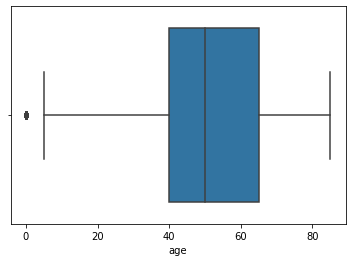

In [13]:
# Box plot
sns.boxplot(df.age)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



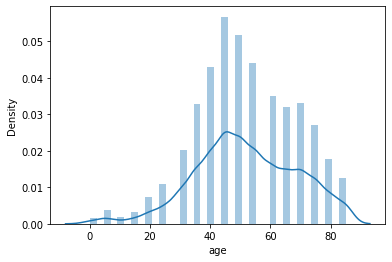

In [14]:
#Distribution plot
sns.distplot(df.age)

Since a clear symmetric data distribution is visible I will use the Mean to fill the missing Age values

In [15]:
df['age'].fillna(df['age'].mean(), inplace=True)

In [16]:
#check if the missing values still persist
df.isna().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [17]:
#Gender data representation
fig = px.histogram(df, x="sex", color="sex", text_auto=True)
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [18]:
#Skin cancer represented on dataset
fig = px.histogram(df, x="dx", color="dx", text_auto=True)
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [19]:
#Skin cancer localization
fig = px.histogram(df, x="localization", color="localization", text_auto=True)
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [20]:
#Skin cancer types of diagnosis
fig = px.histogram(df, x="dx_type", color="dx_type", text_auto=True)
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [21]:
# How the cancers were diagnosticated?
fig = px.histogram(df, x="dx", color="dx_type", text_auto=True, barmode='group')
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [22]:
# Which skin cancer is more prevalent on man and women?
fig = px.histogram(df, x="dx", color="sex", text_auto=True, barmode='group')
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [23]:
# Gender and age
fig = px.histogram(df, x="age", color="sex", text_auto=True)
fig.show()

In [24]:
# Age and cancer prevalence
fig = px.histogram(df, x="age", color="dx", text_auto=True)
fig.show()

In [25]:
# Age and cancer localization
fig = px.histogram(df, x="age", color="localization", text_auto=True)
fig.show()

In [26]:
# Most prevalent localization of cancer in man and women
fig = px.histogram(df, x="localization", color="sex", text_auto=True, barmode='group')
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [27]:
# Skin cancer and it's localization
fig = px.histogram(df, x="localization", color="dx", text_auto=True)
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [28]:
# Trying to capture in a easier way visual relationships between the different features presented on dataset
fig = px.sunburst(df, path=['dx', 'localization', 'age', 'sex'])
fig.show()

Image containing examples of each cancer present in dataset :

In [29]:
# Skin cancer presented on dataset
cancer_list = df['dx'].unique()
cancer_list

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

In [30]:
# Select in a random way 3 representative pictures of each cancer
dict_pictures = {}

for cancer in cancer_list:
  dx_list = df['image_id'].loc[df['dx'] == cancer].sample(3)
  dict_pictures[cancer] = dx_list

dict_pictures

{'bkl': 177    ISIC_0032553
 675    ISIC_0026553
 607    ISIC_0031352
 Name: image_id, dtype: object, 'nv': 8136    ISIC_0030243
 5580    ISIC_0025999
 7170    ISIC_0026618
 Name: image_id, dtype: object, 'df': 1122    ISIC_0029039
 1183    ISIC_0024553
 1179    ISIC_0033860
 Name: image_id, dtype: object, 'mel': 1733    ISIC_0033874
 1926    ISIC_0033999
 1825    ISIC_0032509
 Name: image_id, dtype: object, 'vasc': 2430    ISIC_0024662
 2410    ISIC_0031201
 2409    ISIC_0029439
 Name: image_id, dtype: object, 'bcc': 2640    ISIC_0033019
 2842    ISIC_0028168
 2462    ISIC_0028155
 Name: image_id, dtype: object, 'akiec': 9946    ISIC_0026457
 9813    ISIC_0031659
 9964    ISIC_0026984
 Name: image_id, dtype: object}


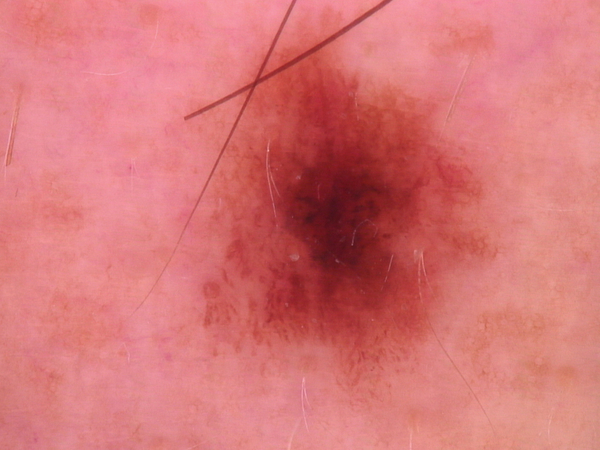

In [31]:
img = io.imread('ISIC_0024306.jpg')
fig = px.imshow(img)
fig.show()

In [34]:

fig = make_subplots(rows=7, cols=3, subplot_titles=('bkl 1', 'bkl 2','bkl 3',
                                                    'nv 1','nv 2','nv 3',
                                                    'df 1', 'df 2', 'df 3', 
                                                    'mel 1', 'mel 2','mel 3',
                                                    'vasc 1', 'vasc 2','vasc 3',
                                                    'bcc 1', 'bcc 2', 'bcc 3', 
                                                    'akiec 1','akiec 2','akiec 3'))


row = 1
column = 1
for lista in dict_pictures.values():
  for i in lista:
    img = io.imread(i+'.jpg')
    fig.add_trace(go.Image(z=img), row=row, col=column)

    column += 1
  column = 1
  fig.show()
  row += 1

#fig.write_html("figure1.html")



FileNotFoundError: ignored

In [143]:
img = io.imread('ISIC_0024306.jpg')
fig = px.imshow(img)
fig.show()